## Predict the price of an Airbnb listing

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df = pd.read_csv(r"C:\Users\Windows 11\Downloads\airbnb_listing_train.csv\airbnb_listing_train.csv")

In [4]:
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,price
0,11602914,Luxury home 100m2+garden in center!,3123809,Marjolein,NaN,De Pijp - Rivierenbuurt,52.35368,4.90177,Entire home/apt,3,13,15-02-2020,0.27,1,0,220
1,13289321,East is where your home is!,10259430,Ana,NaN,Oud-Oost,52.35728,4.92052,Entire home/apt,4,14,19-06-2019,0.29,1,0,110
2,40779315,Amsterdam Central - LUXURY house in BUSY STREET,224969266,Mark,NaN,Centrum-West,52.37582,4.89850,Entire home/apt,2,9,16-03-2020,1.65,1,7,100
3,7820311,great appartment down town,693472,Ayden,NaN,Westerpark,52.37792,4.87300,Entire home/apt,3,42,17-02-2020,0.72,1,0,130
4,27346603,Private room with canal view in peaceful area,41888346,Alissa,NaN,Westerpark,52.38051,4.87493,Private room,2,89,26-02-2020,4.02,1,24,90


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12901 entries, 0 to 12900
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              12901 non-null  int64  
 1   name                            12879 non-null  object 
 2   host_id                         12901 non-null  int64  
 3   host_name                       12893 non-null  object 
 4   neighbourhood_group             0 non-null      float64
 5   neighbourhood                   12901 non-null  object 
 6   latitude                        12901 non-null  float64
 7   longitude                       12901 non-null  float64
 8   room_type                       12901 non-null  object 
 9   minimum_nights                  12901 non-null  int64  
 10  number_of_reviews               12901 non-null  int64  
 11  last_review                     11305 non-null  object 
 12  reviews_per_month               

In [6]:
df.describe()

,id,host_id,neighbourhood_group,latitude,longitude,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,price
count,1.290100e+04,1.290100e+04,0.0,12901.000000,12901.000000,12901.000000,12901.000000,11305.000000,12901.000000,12901.000000,12901.000000
mean,1.984923e+07,6.321700e+07,NaN,52.365313,4.889744,3.542516,24.803194,0.748501,2.136501,61.392295,166.959538
std,1.216241e+07,8.010814e+07,NaN,0.016418,0.036016,15.154077,53.406134,1.260791,6.001838,107.988329,234.794630
min,2.016800e+04,3.592000e+03,NaN,52.289270,4.755720,1.000000,0.000000,0.010000,1.000000,0.000000,6.000000
25%,9.869642e+06,8.948269e+06,NaN,52.355190,4.863950,2.000000,2.000000,0.180000,1.000000,0.000000,99.000000
50%,1.874939e+07,2.711601e+07,NaN,52.364570,4.887130,2.000000,9.000000,0.380000,1.000000,0.000000,135.000000
75%,2.914232e+07,8.337686e+07,NaN,52.375110,4.909310,3.000000,24.000000,0.770000,1.000000,87.000000,190.000000
max,4.370900e+07,3.490175e+08,NaN,52.425090,5.018400,1001.000000,843.000000,50.000000,78.000000,365.000000,9000.000000


In [7]:
df.isnull().sum()

id                                    0
name                                 22
host_id                               0
host_name                             8
neighbourhood_group               12901
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
minimum_nights                        0
number_of_reviews                     0
last_review                        1596
reviews_per_month                  1596
calculated_host_listings_count        0
availability_365                      0
price                                 0
dtype: int64

In [8]:
df.drop(["name","host_name","neighbourhood_group"],axis=1,inplace=True)

In [9]:
df.columns

Index(['id', 'host_id', 'neighbourhood', 'latitude', 'longitude', 'room_type',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365', 'price'],
      dtype='object')

In [10]:
df.drop(["last_review","reviews_per_month"],axis=1,inplace=True)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12901 entries, 0 to 12900
Data columns (total 11 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              12901 non-null  int64  
 1   host_id                         12901 non-null  int64  
 2   neighbourhood                   12901 non-null  object 
 3   latitude                        12901 non-null  float64
 4   longitude                       12901 non-null  float64
 5   room_type                       12901 non-null  object 
 6   minimum_nights                  12901 non-null  int64  
 7   number_of_reviews               12901 non-null  int64  
 8   calculated_host_listings_count  12901 non-null  int64  
 9   availability_365                12901 non-null  int64  
 10  price                           12901 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 1.1+ MB


In [12]:
df.neighbourhood = df.neighbourhood.astype("category")

In [13]:
df.neighbourhood = df.neighbourhood.cat.codes

In [14]:
df.neighbourhood.value_counts()

7     2209
8     1600
5     1429
4     1097
20     958
21     924
17     831
2      730
14     644
19     381
16     376
11     321
18     269
13     257
12     171
3      155
10     144
6       88
15      83
9       80
0       78
1       76
Name: neighbourhood, dtype: int64

In [15]:
df.room_type.value_counts()

Entire home/apt    10064
Private room        2622
Hotel room           174
Shared room           41
Name: room_type, dtype: int64

In [16]:
df = pd.get_dummies(df,columns=["room_type"])

In [17]:
df.head()

,id,host_id,neighbourhood,latitude,longitude,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365,price,room_type_Entire home/apt,room_type_Hotel room,room_type_Private room,room_type_Shared room
0,11602914,3123809,8,52.35368,4.90177,3,13,1,0,220,1,0,0,0
1,13289321,10259430,17,52.35728,4.92052,4,14,1,0,110,1,0,0,0
2,40779315,224969266,5,52.37582,4.89850,2,9,1,7,100,1,0,0,0
3,7820311,693472,20,52.37792,4.87300,3,42,1,0,130,1,0,0,0
4,27346603,41888346,20,52.38051,4.87493,2,89,1,24,90,0,0,1,0


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12901 entries, 0 to 12900
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              12901 non-null  int64  
 1   host_id                         12901 non-null  int64  
 2   neighbourhood                   12901 non-null  int8   
 3   latitude                        12901 non-null  float64
 4   longitude                       12901 non-null  float64
 5   minimum_nights                  12901 non-null  int64  
 6   number_of_reviews               12901 non-null  int64  
 7   calculated_host_listings_count  12901 non-null  int64  
 8   availability_365                12901 non-null  int64  
 9   price                           12901 non-null  int64  
 10  room_type_Entire home/apt       12901 non-null  uint8  
 11  room_type_Hotel room            12901 non-null  uint8  
 12  room_type_Private room          

<AxesSubplot:>

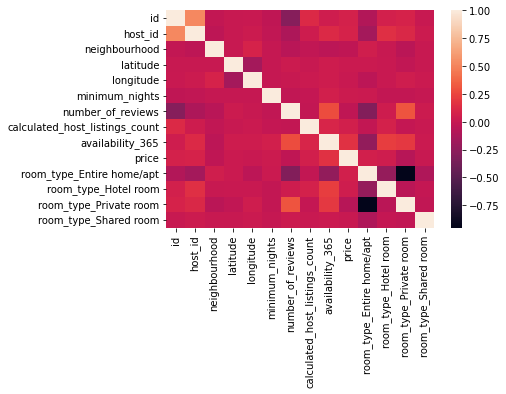

In [18]:
sns.heatmap(df.corr())

In [20]:
df.groupby('price').mean()

,id,host_id,neighbourhood,latitude,longitude,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365,room_type_Entire home/apt,room_type_Hotel room,room_type_Private room,room_type_Shared room
price,,,,,,,,,,,,,
6,6764212.00,2.793078e+06,8.00,52.354910,4.887690,2.000,14.000,1.000,0.000,1.000,0.000,0.00,0.0
10,40588320.00,3.138391e+08,16.00,52.387240,4.908400,1.000,5.000,1.000,195.000,0.000,0.000,1.00,0.0
12,4009850.00,1.351304e+06,16.00,52.382800,4.918230,2.000,11.000,1.000,0.000,1.000,0.000,0.00,0.0
19,11147683.00,3.420389e+07,2.00,52.372510,4.842580,6.000,4.000,1.000,0.000,0.000,0.000,1.00,0.0
20,27910574.75,1.902505e+08,13.25,52.376791,4.885459,7.125,16.625,7.875,311.125,0.125,0.625,0.25,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5555,32355945.00,1.464510e+06,17.00,52.357260,4.933370,1.000,2.000,78.000,0.000,1.000,0.000,0.00,0.0
6477,43121886.00,3.186499e+08,4.00,52.369883,4.902973,1.000,0.000,6.000,343.000,0.000,0.000,1.00,0.0
7000,41911423.75,3.166810e+08,5.00,52.370357,4.889113,1.000,0.000,5.000,364.750,0.000,0.000,1.00,0.0


In [21]:
x = df.drop(["price"],axis=1)
y = df["price"]

In [22]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3, random_state=0)

In [23]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [25]:
y_pred = lr.predict(x_test)

In [27]:
from sklearn.model_selection import GridSearchCV

In [31]:
model = LinearRegression()
parameters = {'fit_intercept':[True,False], 'normalize':[True,False], 'copy_X':[True, False]}
grid = GridSearchCV(estimator=model, param_grid = parameters, cv = 2, n_jobs=-1)
grid.fit(x_train, y_train)

C:\Python310\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(


GridSearchCV(cv=2, estimator=LinearRegression(), n_jobs=-1,
             param_grid={'copy_X': [True, False],
                         'fit_intercept': [True, False],
                         'normalize': [True, False]})

In [32]:
grid.best_score_

0.03719321237437612

In [33]:
grid.best_params_

{'copy_X': True, 'fit_intercept': True, 'normalize': True}

In [34]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE: 76.57044248010448
MSE: 87142.49979080165
RMSE: 295.1990850101024
